# Datathon 2024

### 1. Define the problem
Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)

### 2. Evaluation
Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.


### 3. Data 
Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/data


## EDA

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datayi getir
train = pd.read_csv('datas/train.csv', low_memory=False)
test = pd.read_csv('datas/test_x.csv', low_memory=False)

In [3]:
# butun columnlara bakmamizi saglar
from IPython import display

pd.set_option('display.max_columns', None)

In [4]:
train.head(2)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1


In [5]:
test.head(2)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,1,2.50 - 2.99,NaN,Amasya Suluova Şehit Muharrem Saygun Anadolu L...,NaN,Amasya,Devlet,Eşit Ağırlık,NaN,50 - 74,Hayır,-,-,İlkokul,Evet,Özel Sektör,Ortaokul,Evet,Diğer,2.0,Hayır,NaN,Evet,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,1,Hazırlığım,NaN,Açık Öğretim Lisesi,NaN,Konya,Devlet,Eşit Ağırlık,NaN,75 - 100,Hayır,-,-,İlkokul,Hayır,-,İlkokul,Evet,Özel Sektör,3.0,Hayır,NaN,Evet,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1


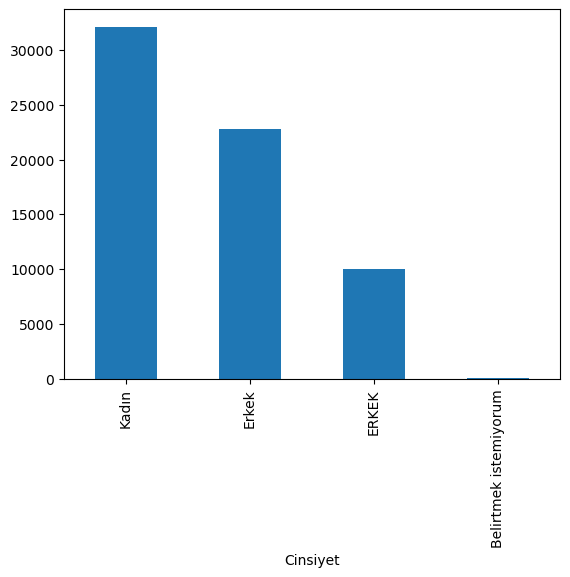

In [6]:
train['Cinsiyet'].value_counts().plot.bar();

In [33]:
# Let's check how much missing value we have
length = len(train)
null_counts = train.isna().sum()
df_null_counts = pd.DataFrame({'Column Name': null_counts.index, 'Null Count': null_counts.values})
df_null_counts = df_null_counts.reset_index(drop=True)
df_null_counts.sort_values(by=['Null Count'], ascending=False, inplace=True)
df_null_counts['Null Count'] = df_null_counts['Null Count']/length # For seeing percentage

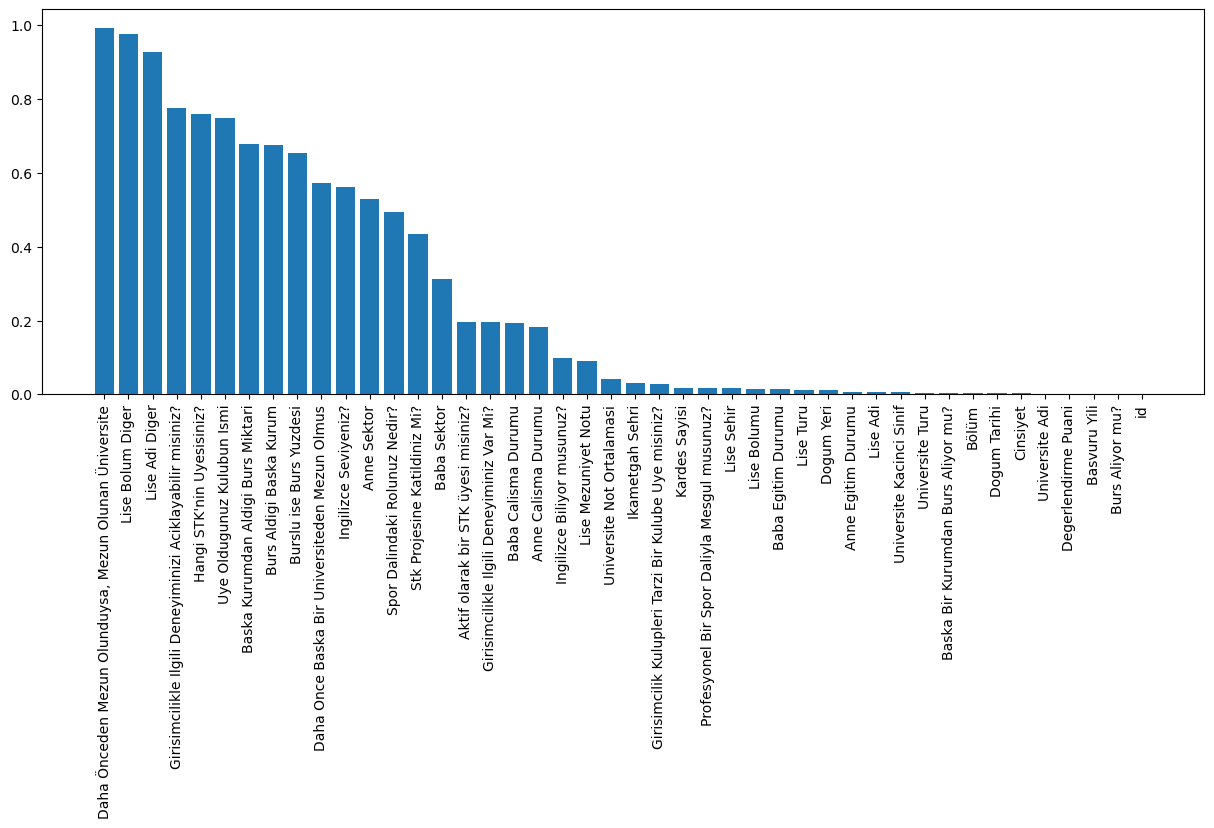

In [37]:
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(df_null_counts['Column Name'], df_null_counts['Null Count']);

In [38]:
train['Dogum Tarihi']

0                4/6/1994
1               6/11/1993
2               1/15/1986
3                6/4/1991
4            2 Kasim 1992
               ...       
65120    18.06.2003 00:00
65121    18.04.2002 00:00
65122    23.10.1999 00:00
65123    17.11.2000 00:00
65124    27.04.2000 00:00
Name: Dogum Tarihi, Length: 65125, dtype: object